## **1. Importing the dependencies**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

## **2. Data loading and understanding**

In [2]:
customer_data = pd.read_csv('Telco-Customer-Churn.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(customer_data.shape)

(7043, 21)


In [5]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
customer_data = customer_data.drop(columns=['customerID'])

In [13]:
#printing the unique values in all columns
numerical_features = ['tenure','MonthlyCharges','TotalCharges']

for col in customer_data.columns:
    if col not in numerical_features:
        print(col,customer_data[col].unique())
        print("-"*100)

gender ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen [0 1]
----------------------------------------------------------------------------------------------------
Partner ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------

In [16]:
len(customer_data[customer_data['TotalCharges']==' '])

11

In [17]:
customer_data['TotalCharges'] = customer_data['TotalCharges'].replace({' ':'0.0'})

In [19]:
customer_data['TotalCharges'] = customer_data['TotalCharges'].astype(float)

In [24]:
print(customer_data['Churn'].value_counts())
# Target columns is heavily imbalanced

Churn
No     5174
Yes    1869
Name: count, dtype: int64


## **3. Exploratory Data Analysis**

In [25]:
customer_data.shape

(7043, 20)

In [26]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### **Numerical Features - Analysis**

In [32]:
def plot_histogram(df,column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(data=df,x=column_name,kde=True)
    plt.title(f"Distribution of {column_name}")
    
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    plt.axvline(col_mean, color='red', linestyle = "--", label = "Mean")
    plt.axvline(col_median, color='green', linestyle = "-", label = "Median")
    
    plt.legend()
    plt.show()

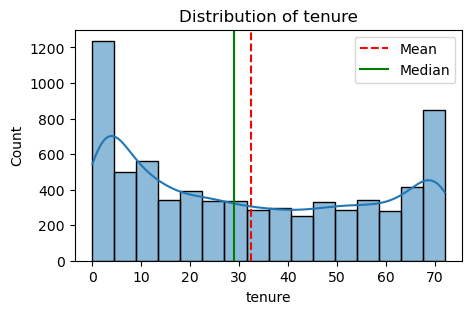

In [33]:
plot_histogram(customer_data,'tenure')

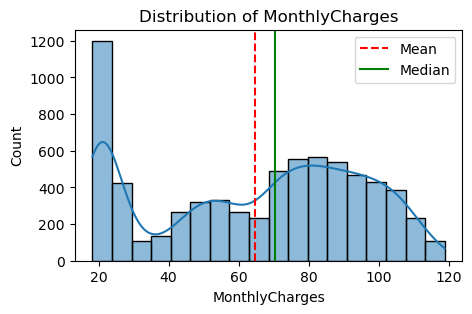

In [34]:
plot_histogram(customer_data,'MonthlyCharges')

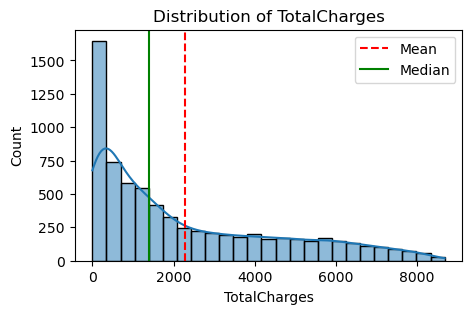

In [35]:
plot_histogram(customer_data,'TotalCharges')

### **Categorical Features - Analysis**

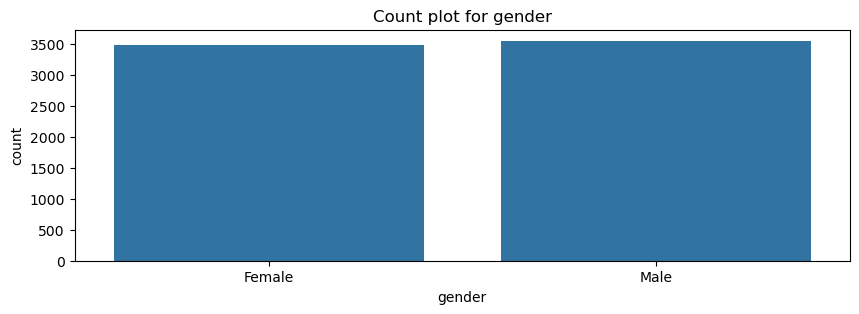

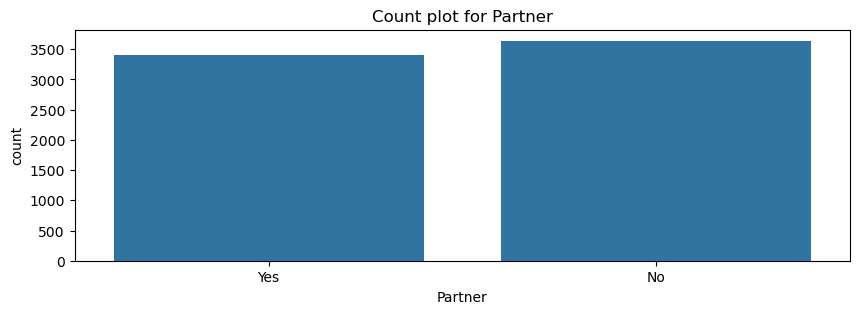

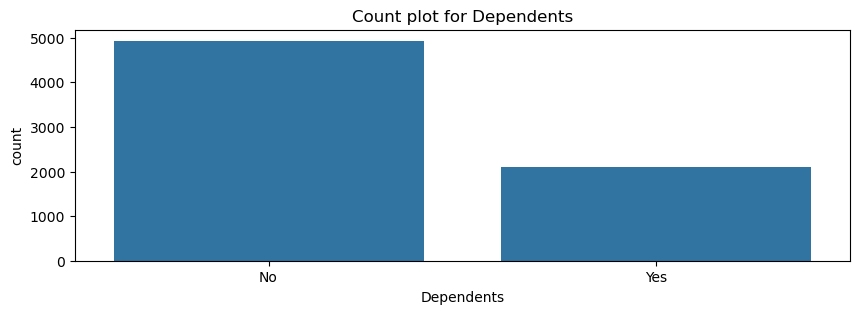

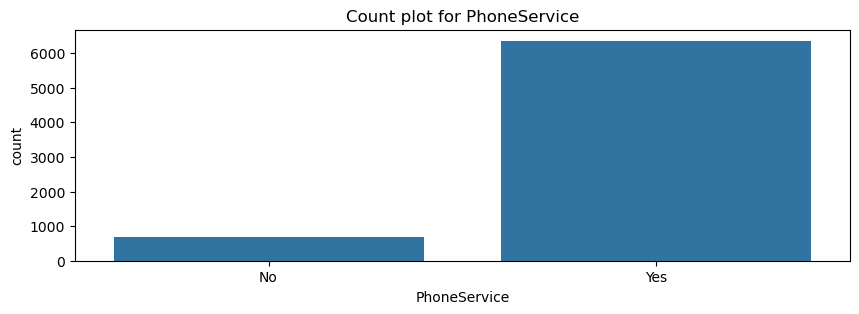

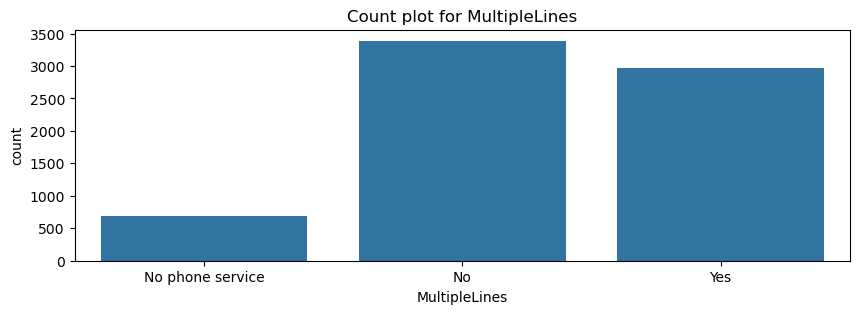

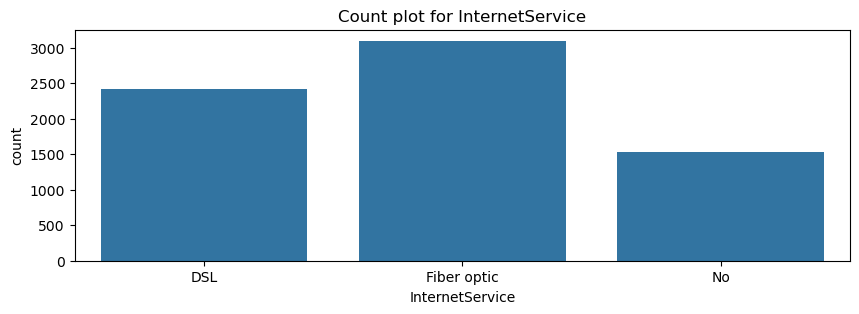

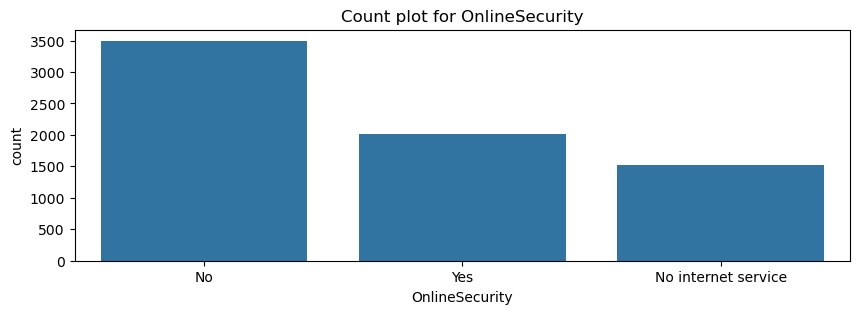

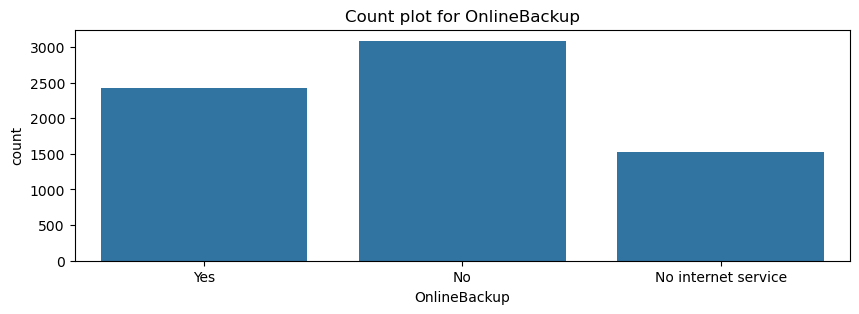

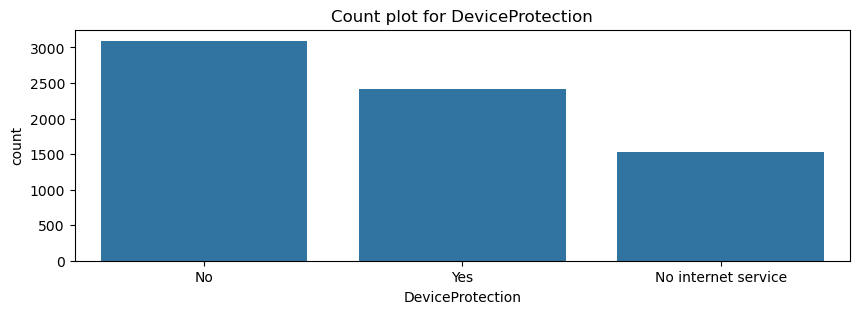

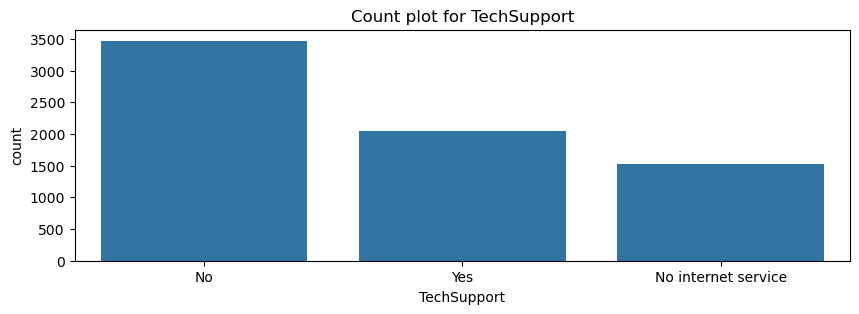

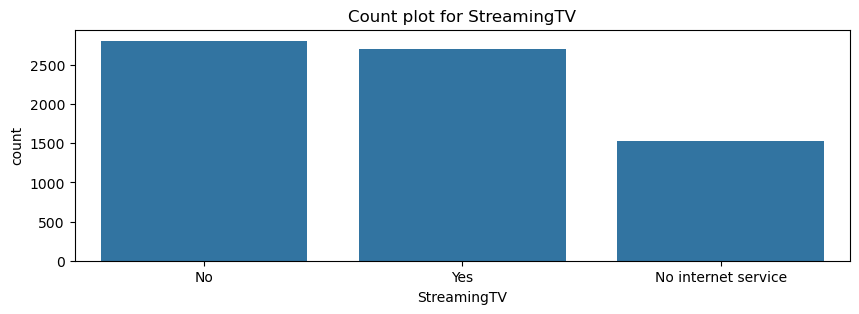

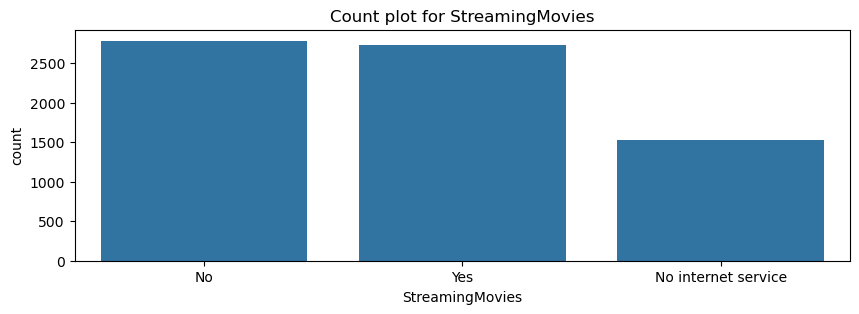

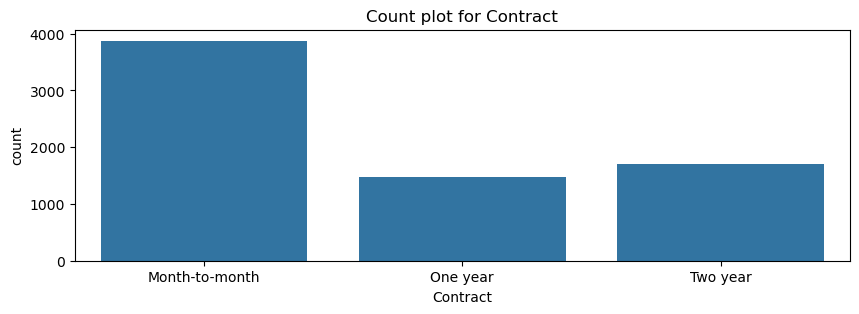

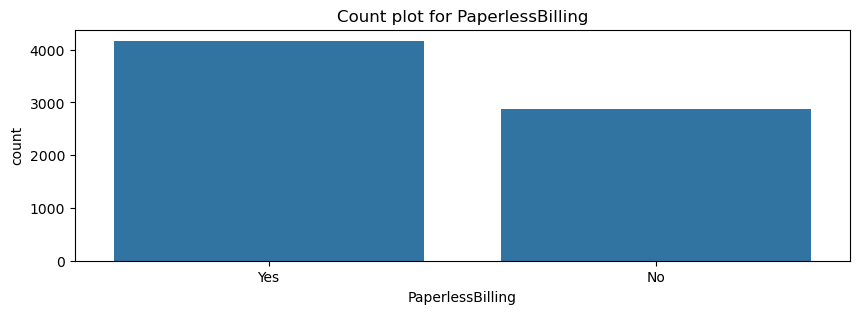

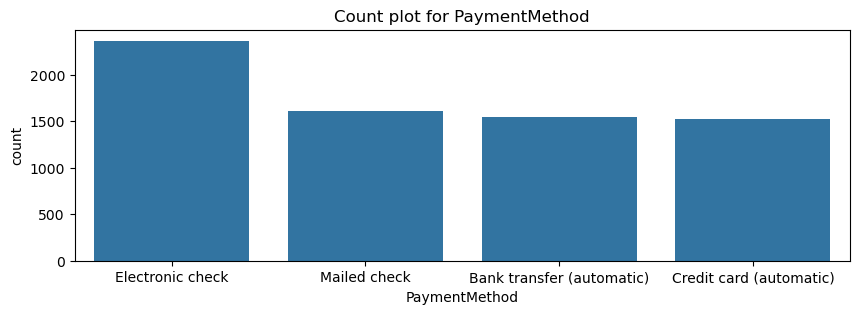

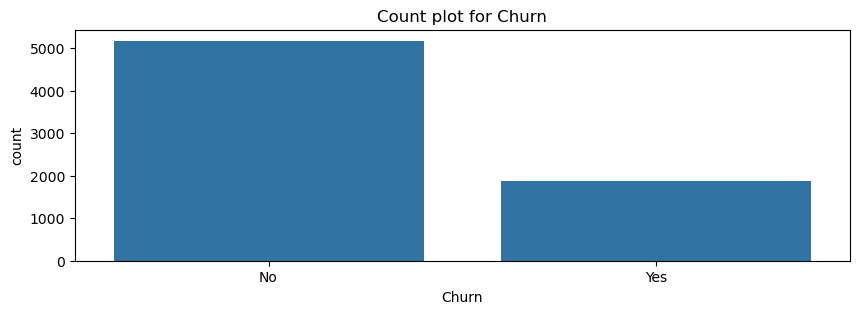

In [43]:
object_cols = customer_data.select_dtypes(include=['object']).columns

for col in object_cols:
    plt.figure(figsize=(10,3))
    sns.countplot(data=customer_data,x=col)
    plt.title(f"Count plot for {col}")
    plt.show()

## **4. Data Preprocessing**

In [46]:
customer_data['Churn'] = customer_data['Churn'].replace({"Yes":1,"No":0})

In [47]:
print(customer_data['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


### **Label Encoding for categorical data**

In [55]:
object_columns = customer_data.select_dtypes(include=['object']).columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [57]:
encoders = {}
for column in object_columns:
    label_encoder = LabelEncoder()
    customer_data[column] = label_encoder.fit_transform(customer_data[column])
    encoders[column] = label_encoder
with open('encoders.pkl','wb') as f:
    pickle.dump(encoders,f)

In [59]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [60]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


## **5. Train test data split**

In [67]:
features = customer_data.drop(columns=['Churn'])
target = customer_data['Churn']

In [69]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.2,random_state=2)
print(features.shape,features_train.shape,features_test.shape)
print(target.shape,target_train.shape,target_test.shape)

(7043, 19) (5634, 19) (1409, 19)
(7043,) (5634,) (1409,)


In [81]:
print(target_train.value_counts())

Churn
0    4113
1    1521
Name: count, dtype: int64


### **Synthetic Minority Oversampling Technique (SMOTE)**

In [82]:
smote = SMOTE(random_state=42)

In [83]:
features_train_smote, target_train_smote = smote.fit_resample(features_train,target_train)

In [84]:
print(target_train_smote.value_counts())

Churn
1    4113
0    4113
Name: count, dtype: int64


## **5. Model Training**

In [85]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=2),
    "Random Forest":RandomForestClassifier(random_state=2),
    "XGBoost": XGBClassifier(random_state=42)
}

In [86]:
for model_name,model in models.items():
    model.fit(features_train_smote,target_train_smote)

In [87]:
for model_name,model in models.items():
    training_prediction = model.predict(features_train_smote)
    training_accuracy = accuracy_score(training_prediction,target_train_smote)
    print(f"Accuracy of {model_name} on training data is {training_accuracy}")

Accuracy of Decision Tree on training data is 0.9984196450279601
Accuracy of Random Forest on training data is 0.9984196450279601
Accuracy of XGBoost on training data is 0.9567225869195235


In [88]:
for model_name,model in models.items():
    testing_prediction = model.predict(features_test)
    testing_accuracy = accuracy_score(testing_prediction,target_test)
    print(f"Accuracy of {model_name} on testing data is {testing_accuracy}")

Accuracy of Decision Tree on testing data is 0.7260468417317246
Accuracy of Random Forest on testing data is 0.7806955287437899
Accuracy of XGBoost on testing data is 0.7771469127040455
